In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from xgboost import XGBRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [130]:
df1 = pd.read_csv('F:/Data/KwhConsumptionBlower78_1.csv')
df2 = pd.read_csv('F:/Data/KwhConsumptionBlower78_2.csv')
df3 = pd.read_csv('F:/Data/KwhConsumptionBlower78_3.csv')

In [131]:
df  = pd.concat([df1, df2, df3], ignore_index=True)

In [132]:
df['Date'] = df['TxnDate'] + ' ' + df['TxnTime']
df.drop(columns=['TxnDate', 'TxnTime', 'Unnamed: 0'], inplace=True)

In [133]:
df = df[['Date', 'Consumption']]

In [134]:
df = df.sort_values(by='Date')
df

,Date,Consumption
1906,01 Feb 2022 00:17:01,0.900
1885,01 Feb 2022 00:36:31,0.890
1863,01 Feb 2022 00:58:08,0.994
1890,01 Feb 2022 01:18:41,0.942
1893,01 Feb 2022 01:38:01,0.882
...,...,...
1817,31 Jan 2022 22:30:52,3.008
1814,31 Jan 2022 22:51:54,2.664
1794,31 Jan 2022 23:12:04,4.048
1809,31 Jan 2022 23:36:31,4.312


In [102]:
df['Date'] = pd.to_datetime(df['Date'], format="%d %b %Y %H:%M:%S")

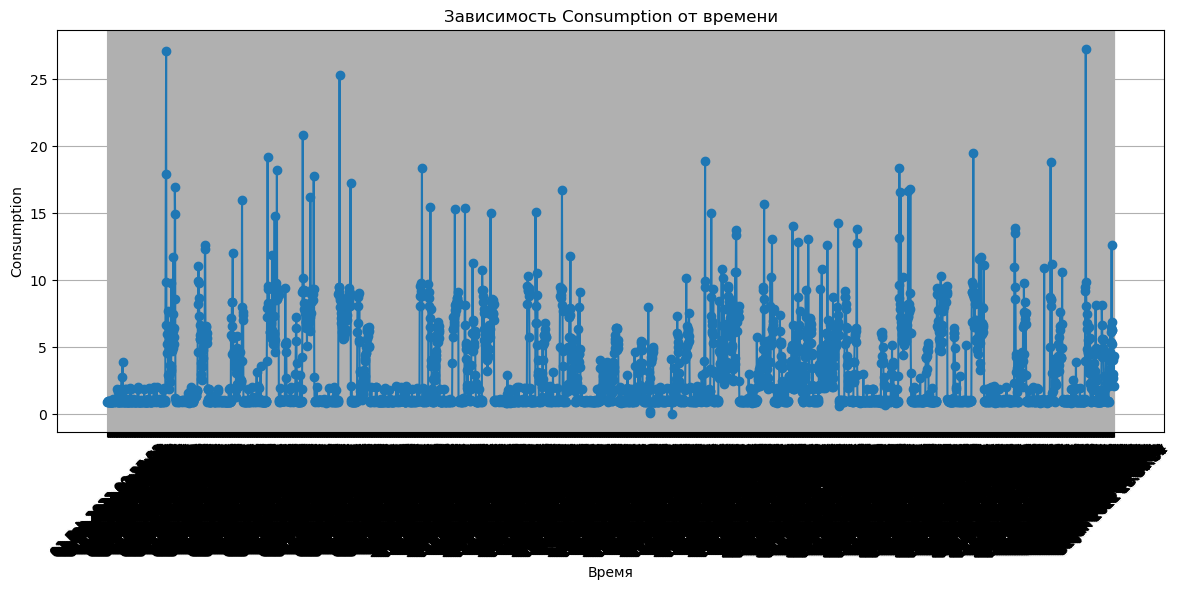

In [135]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Consumption'], marker='o')
plt.title('Зависимость Consumption от времени')
plt.xlabel('Время')
plt.ylabel('Consumption')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

<Axes: >

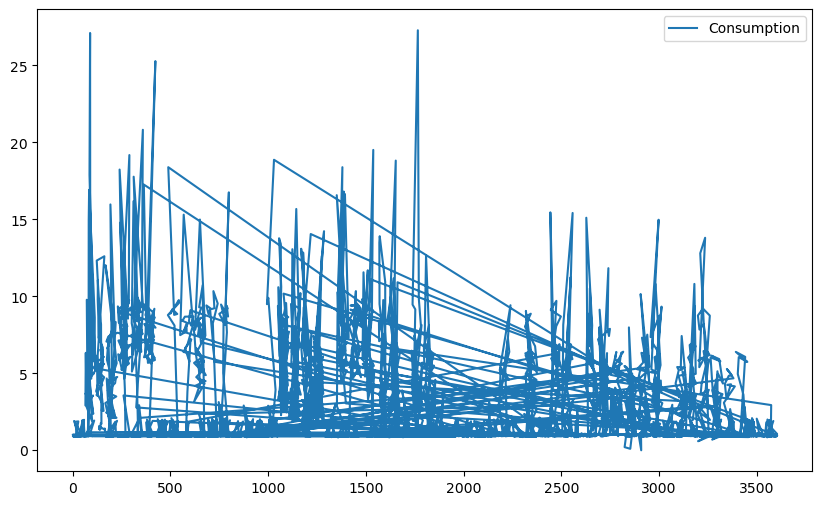

In [136]:
df.plot(figsize=(10, 6)) # ерунда какая-то

<Figure size 1000x500 with 0 Axes>

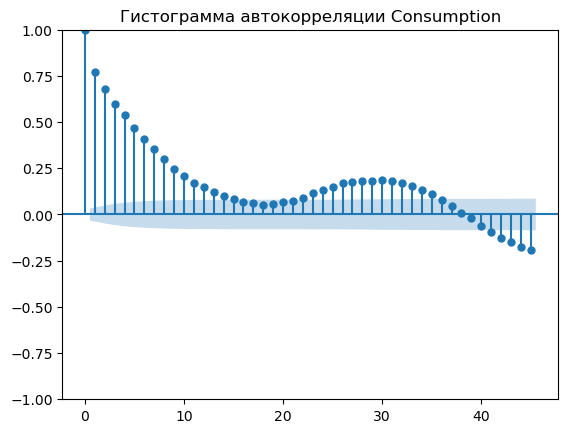

In [113]:
plt.figure(figsize=(10, 5))
plot_acf(df['Consumption'], lags=45)  # Укажите количество лагов
plt.title('Гистограмма автокорреляции Consumption')
plt.show()

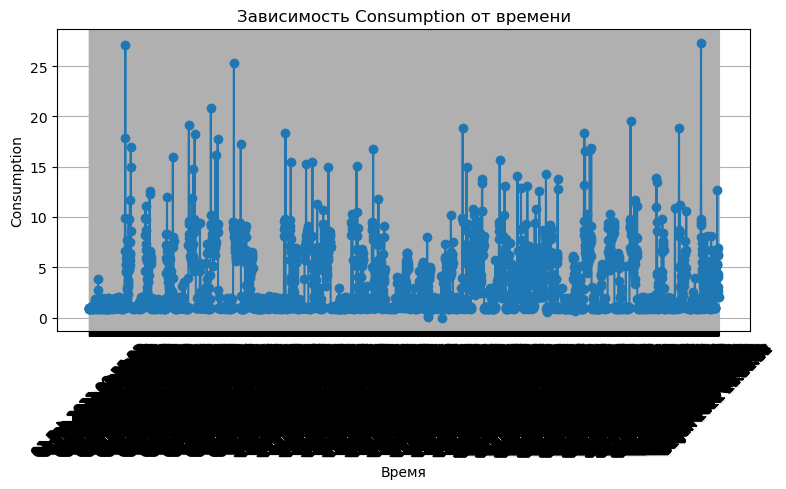

In [137]:
# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(df['Date'], df['Consumption'], marker='o')
plt.title('Зависимость Consumption от времени')
plt.xlabel('Время')
plt.ylabel('Consumption')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

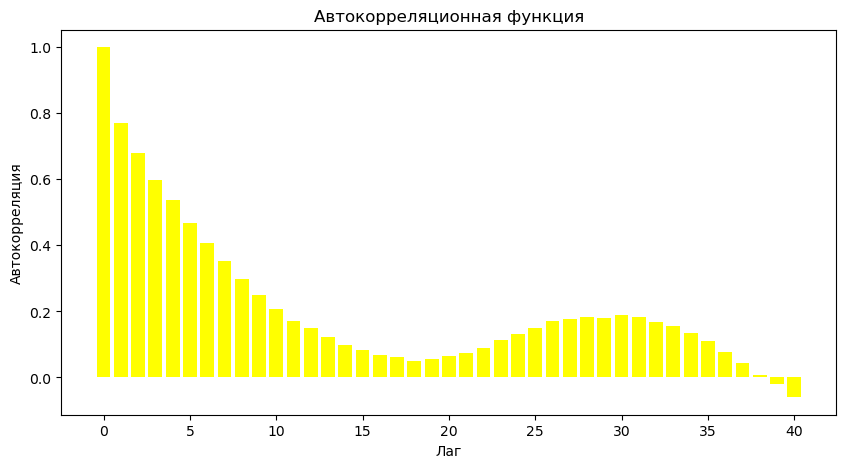

In [84]:
lags = 40  # Количество лагов для анализа
acf_values = acf(df['Consumption'], nlags=lags)

# Визуализация
plt.figure(figsize=(10, 5))
plt.bar(range(lags + 1), acf_values, color='yellow')
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.title('Автокорреляционная функция')
plt.show()

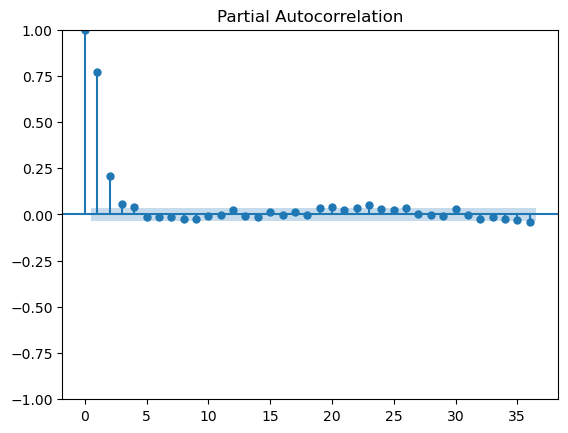

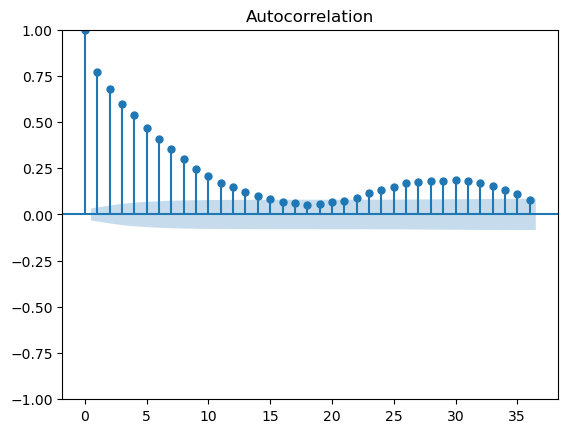

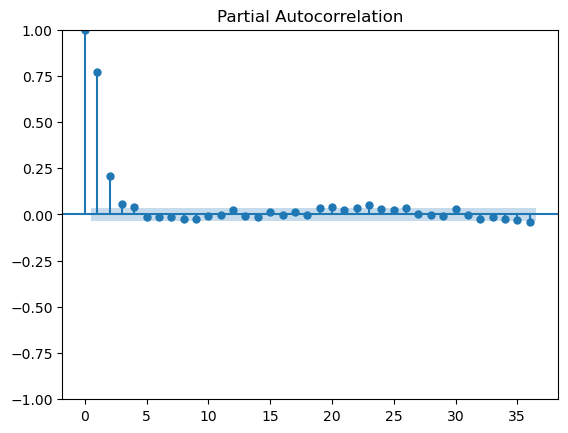

In [87]:
plot_acf(df['Consumption'])
plot_pacf(df['Consumption'])

In [138]:
train_size = int(len(df)*0.8)
train_data, test_data = df[0:train_size], df[train_size:]

In [139]:
def test_stationarity(timeseries):
    print('Результаты теста Дики-Фуллера:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if dfoutput['p-value'] <= 0.05:
        print("Ряд стационарен (отвергаем нулевую гипотезу)")
    else:
        print("Ряд нестационарен (не отвергаем нулевую гипотезу)")

In [140]:
print("До дифференцирования:")
test_stationarity(train_data['Consumption'])

До дифференцирования:
Результаты теста Дики-Фуллера:
Test Statistic                -6.293942e+00
p-value                        3.543475e-08
#Lags Used                     2.500000e+01
Number of Observations Used    2.858000e+03
Critical Value (1%)           -3.432640e+00
Critical Value (5%)           -2.862552e+00
Critical Value (10%)          -2.567309e+00
dtype: float64
Ряд стационарен (отвергаем нулевую гипотезу)


In [32]:
# Если ряд нестационарен, применяем дифференцирование (d)
# Попробуем первое дифференцирование
diff_data = data.diff().dropna()
print("\nПосле первого дифференцирования:")
test_stationarity(diff_data['Consumption'])

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [141]:
# 5. Построение и обучение модели ARIMA
arima_order = (1, 1, 1) # (p, d, q)
model = ARIMA(train_data['Consumption'], order=arima_order)
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                 2884
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5920.222
Date:                Mon, 09 Jun 2025   AIC                          11846.445
Time:                        16:33:28   BIC                          11864.344
Sample:                             0   HQIC                         11852.896
                               - 2884                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2469      0.026      9.632      0.000       0.197       0.297
ma.L1         -0.6040      0.021    -28.185      0.000      -0.646      -0.562
sigma2         3.5574      0.031    116.566      0.0

F:\bsuir\python_problem\Anaconda\anotherone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\bsuir\python_problem\Anaconda\anotherone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\bsuir\python_problem\Anaconda\anotherone\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [142]:
# 6. Прогнозирование
forecast_steps = len(test_data)
forecast = model_fit.predict(start=len(test_data), end=len(test_data) + forecast_steps -1)

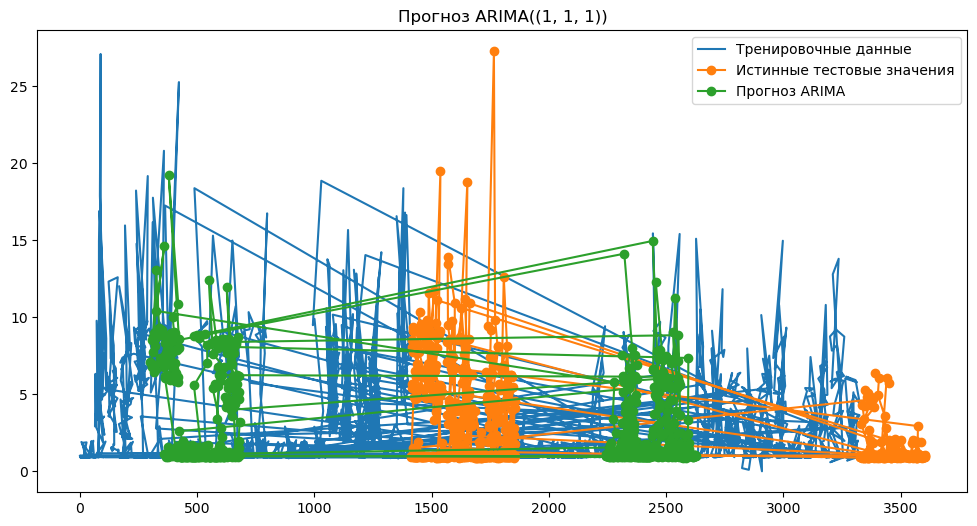

RMSE для ARIMA: 3.992


In [143]:
# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(train_data['Consumption'], label='Тренировочные данные')
plt.plot(test_data['Consumption'], label='Истинные тестовые значения', marker='o')
plt.plot(forecast, label='Прогноз ARIMA', marker='o')
plt.title(f'Прогноз ARIMA({arima_order})')
plt.legend()
plt.show()

# Оценка производительности (например, Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test_data['Consumption'], forecast))
print(f'RMSE для ARIMA: {rmse:.3f}')

# аналогично ерунда

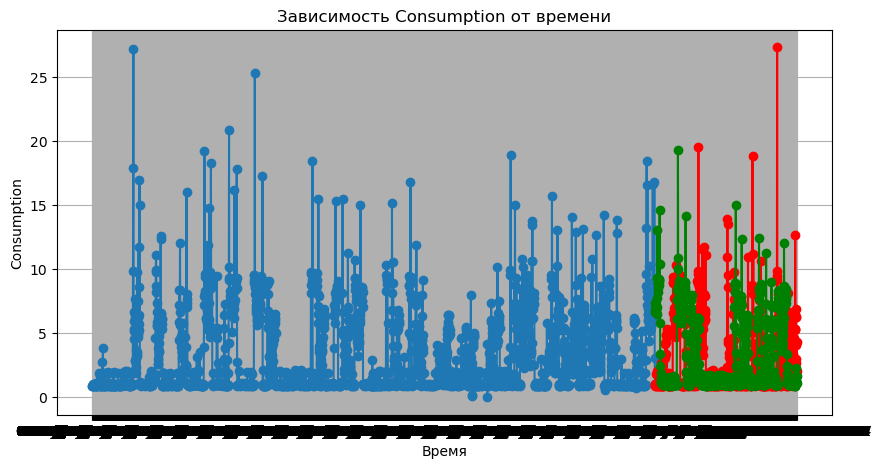

In [144]:
plt.figure(figsize=(10, 5))
plt.plot(train_data['Date'], train_data['Consumption'], marker='o')
plt.plot(test_data['Date'], test_data['Consumption'], marker='o', color='red', label='test')
plt.plot(test_data['Date'], forecast, marker='o', color='green', label='prediction')

plt.title('Зависимость Consumption от времени')
plt.xlabel('Время')
plt.ylabel('Consumption')
#plt.xticks(rotation=45)
plt.grid()
#plt.tight_layout()
plt.show()

Mean Squared Error: 3.0076465069187637


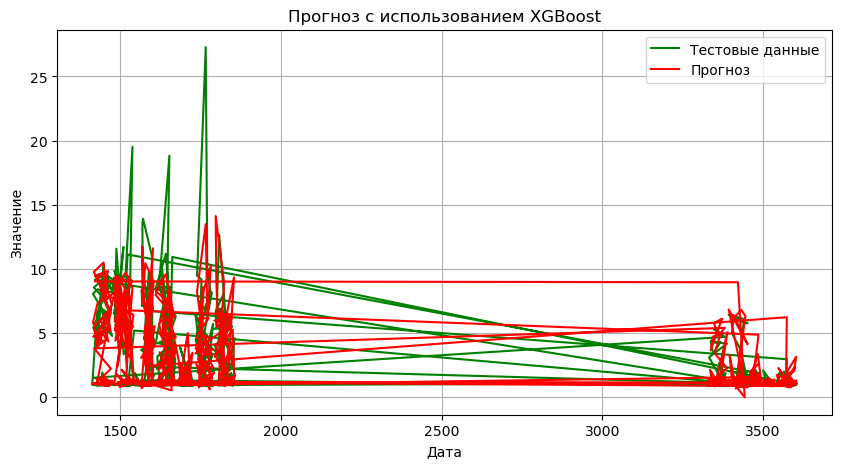

In [152]:
df['Date'] = pd.to_datetime(df['Date'], format="%d %b %Y %H:%M:%S")

# Создание лаговых признаков
df['Lag1'] = df['Consumption'].shift(1)
df['Lag2'] = df['Consumption'].shift(2)
df['Lag3'] = df['Consumption'].shift(3)

df.dropna(inplace=True)

# Определение целевой переменной и признаков
X = df[['Lag1', 'Lag2', 'Lag3']]
y = df['Consumption']

train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 5))
plt.plot(df.index[-len(y_test):], y_test, label='Тестовые данные', color='green')
plt.plot(df.index[-len(y_test):], y_pred, label='Прогноз', color='red')
plt.title('Прогноз с использованием XGBoost')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()